# Exercise 3

Use logistic regression to predict the probability of a passenger surviving.

https://www.kaggle.com/competitions/titanic/overview

In [241]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
from seaborn import load_dataset
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Dataset File

In [237]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)

In [ ]:
df = pd.read_csv('https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true')
df.head()

In [240]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

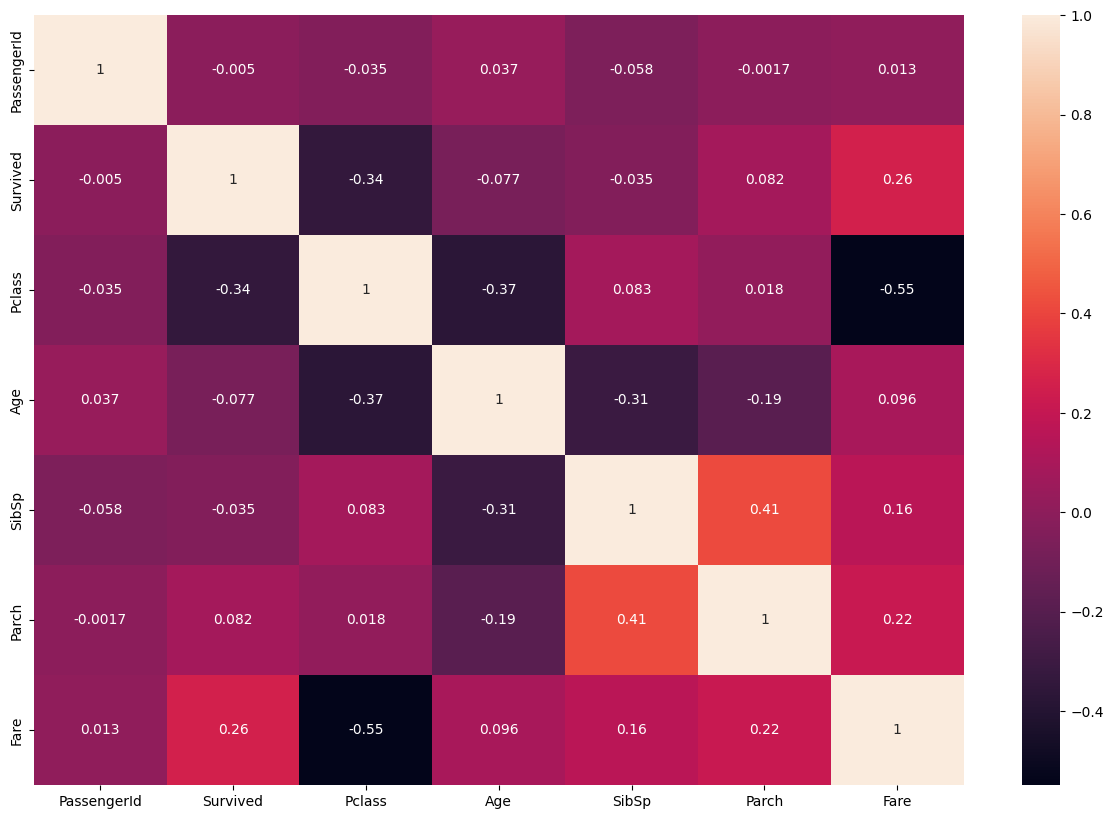

In [242]:
corr = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [243]:
df = df.drop('Cabin', axis=1) ##Delete the cabin column, could have been redundant bc more than 70% of rows have empty cabin.
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Age', ylabel='Count'>

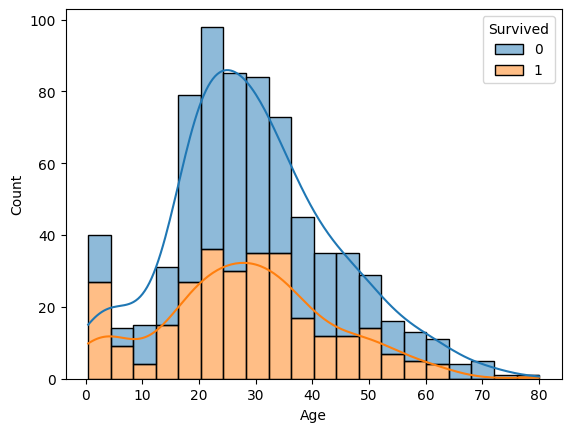

In [244]:
sns.histplot(df, x='Age', hue='Survived', kde=True, multiple='stack')

In [246]:
df['Age_missing'] = df['Age'].isna().astype(int) ##To ack passengers with missing age info

In [247]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.') ##Extract prefixes from names.
df['Title'] = df['Title'].replace(['Mlle','Ms','Mme'],'Miss')

In [248]:
medians = df.groupby('Title')['Age'].median()
df['Age'] = df.apply(lambda r: medians[r['Title']] if pd.isna(r['Age']) else r['Age'], axis=1) ##Assign an age class base on the title extracted from prefixes and median of age for those with missing ages
df['Age_group'] = pd.cut(df['Age'], bins=[0,12,18,40,120], labels=['child','teen','adult','senior'])

In [249]:
categorical_cols = ['Sex', 'Embarked', 'Title', 'Age_group']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Age_missing,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Sir,Title_the Countess,Age_group_teen,Age_group_adult,Age_group_senior
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,...,False,False,True,False,False,False,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,...,False,False,False,True,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,...,False,True,False,False,False,False,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,...,False,False,False,True,False,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,...,False,False,True,False,False,False,False,False,True,False


In [252]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Age_missing,...,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Sir,Title_the Countess,Age_group_teen,Age_group_adult,Age_group_senior,FareLog
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,...,False,True,False,False,False,False,False,True,False,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,...,False,False,True,False,False,False,False,True,False,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,...,True,False,False,False,False,False,False,True,False,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,...,False,False,True,False,False,False,False,True,False,3.990834
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,...,False,True,False,False,False,False,False,True,False,2.202765


In [253]:
df['FareLog'] = np.log1p(df['Fare'])

In [254]:
df['Ticket_count'] = df.groupby('Ticket')['Ticket'].transform('count') #replace ticket with ticket_count

In [255]:
df = df.drop('Ticket', axis=1)

In [256]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Age_missing,Sex_male,...,Title_Mr,Title_Mrs,Title_Rev,Title_Sir,Title_the Countess,Age_group_teen,Age_group_adult,Age_group_senior,FareLog,Ticket_count
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",40.0,1,1,134.5000,0,False,...,False,True,False,False,False,False,True,False,4.908972,2
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",35.0,1,0,133.6500,1,False,...,False,True,False,False,False,False,True,False,4.902679,2
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,0,True,...,True,False,False,False,False,False,False,True,3.967694,1
260,261,0,3,"Smith, Mr. Thomas",30.0,0,0,7.7500,1,True,...,True,False,False,False,False,False,True,False,2.169054,1
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",22.0,0,0,7.1250,0,True,...,True,False,False,False,False,False,True,False,2.094946,1
631,632,0,3,"Lundahl, Mr. Johan Svensson",51.0,0,0,7.0542,0,True,...,True,False,False,False,False,False,False,True,2.086194,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,26.5500,0,False,...,False,False,False,False,False,False,False,True,3.316003,1
623,624,0,3,"Hansen, Mr. Henry Damsgaard",21.0,0,0,7.8542,0,True,...,True,False,False,False,False,False,True,False,2.180892,1
708,709,1,1,"Cleaver, Miss. Alice",22.0,0,0,151.5500,0,False,...,False,False,False,False,False,False,True,False,5.027492,4
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",42.0,1,0,26.0000,0,False,...,False,True,False,False,False,False,False,True,3.295837,1


In [257]:
df = df.drop(['Name'], axis=1)

In [258]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis = 1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.23, stratify = y, random_state = 0)

In [259]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [260]:
model.score(x_test, y_test)

0.8146341463414634

## Test File

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Sample Submission File

In [ ]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [ ]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [262]:
# Reload the sample submission file to ensure 'PassengerId' is present
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'
sf=pd.read_csv(sample_submission_url)

id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cabin
- Embarked
- Name
- Sex
- Ticket
Feature names seen at fit time, yet now missing:
- Age_group_adult
- Age_group_senior
- Age_group_teen
- Age_missing
- Embarked_Q
- ...


In [263]:
dt = dt.drop('Cabin', axis=1)

dt['Age_missing'] = dt['Age'].isna().astype(int)

dt['Title'] = dt['Name'].str.extract(r',\s*([^\.]+)\.')
dt['Title'] = dt['Title'].replace(['Mlle','Ms','Mme'],'Miss')


dt_medians = dt.groupby('Title')['Age'].median()
dt['Age'] = dt.apply(lambda r: dt_medians[r['Title']] if pd.isna(r['Age']) else r['Age'], axis=1)

dt['Age_group'] = pd.cut(dt['Age'], bins=[0,12,18,40,120], labels=['child','teen','adult','senior'])

categorical_cols_dt = ['Sex', 'Embarked', 'Title', 'Age_group']
dt = pd.get_dummies(dt, columns=categorical_cols_dt, drop_first=True)

dt['FareLog'] = np.log1p(dt['Fare'])
dt['FareLog'] = dt['FareLog'].replace([np.inf, -np.inf], 0)

dt['Ticket_count'] = dt.groupby('Ticket')['Ticket'].transform('count')

dt = dt.drop(['Ticket', 'Name'], axis=1)


missing_cols = set(x_train.columns) - set(dt.columns)
for c in missing_cols:
    dt[c] = 0

dt = dt[x_train.columns]

display(dt.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_missing,Sex_male,Embarked_Q,Embarked_S,...,Title_Mr,Title_Mrs,Title_Rev,Title_Sir,Title_the Countess,Age_group_teen,Age_group_adult,Age_group_senior,FareLog,Ticket_count
0,892,3,34.5,0,0,7.8292,0,True,True,False,...,True,False,False,0,0,False,True,False,2.178064,1
1,893,3,47.0,1,0,7.0000,0,False,False,True,...,False,True,False,0,0,False,False,True,2.079442,1
2,894,2,62.0,0,0,9.6875,0,True,True,False,...,True,False,False,0,0,False,False,True,2.369075,1
3,895,3,27.0,0,0,8.6625,0,True,False,True,...,True,False,False,0,0,False,True,False,2.268252,1
4,896,3,22.0,1,1,12.2875,0,False,False,True,...,False,True,False,0,0,False,True,False,2.586824,1


In [264]:
y_pred = model.predict(dt)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [265]:
dt.isnull().sum()

,0
PassengerId,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,1
Age_missing,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


In [266]:
dt['Fare'] = dt['Fare'].fillna(dt['Fare'].median())
dt['FareLog'] = np.log1p(dt['Fare']) # Recalculate FareLog after filling NaN in Fare
y_pred = model.predict(dt)

In [268]:
model.score(x_test, y_test)

0.8146341463414634

## Generate Results

In [267]:
submission_df = pd.DataFrame({
    'PassengerId': id,
    'Survived': y_pred
})

submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
